In [ ]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 561, done.
remote: Total 561 (delta 0), reused 0 (delta 0), pack-reused 561
Receiving objects: 100% (561/561), 4.64 MiB | 6.55 MiB/s, done.
Resolving deltas: 100% (288/288), done.
/content/Real-ESRGAN
     |████████████████████████████████| 161 kB 31.6 MB/s 
     |████████████████████████████████| 5.8 MB 59.0 MB/s 
     |████████████████████████████████| 190 kB 72.8 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-py3-none-any.whl size=194440 sha256=3d0fcaaefbd1db494a1d519ac3c4f2b470c16eaf15e387475cb86d4dfae1a9d5
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 5.9 MB/s 
     |████████████████████████████████| 177 kB 63.5 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=eb742717bdca2f9c3b44b94837ad7928121c1bc1ee283f6955154cdf1b551df3
  Stored

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving image-bg-blur.jpg to image-bg-blur.jpg
move image-bg-blur.jpg to upload/image-bg-blur.jpg


In [ ]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --half --face_enhance --tile 1000
# -n, --model_name: Model names
# --outscale: Output scale, can be arbitrary scale factore. 

Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 154MB/s] 
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANCleanv1-NoCE-C2.pth

100% 332M/332M [00:02<00:00, 139MB/s]
Testing 0 image-bg-blur
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
	Tile 1/1

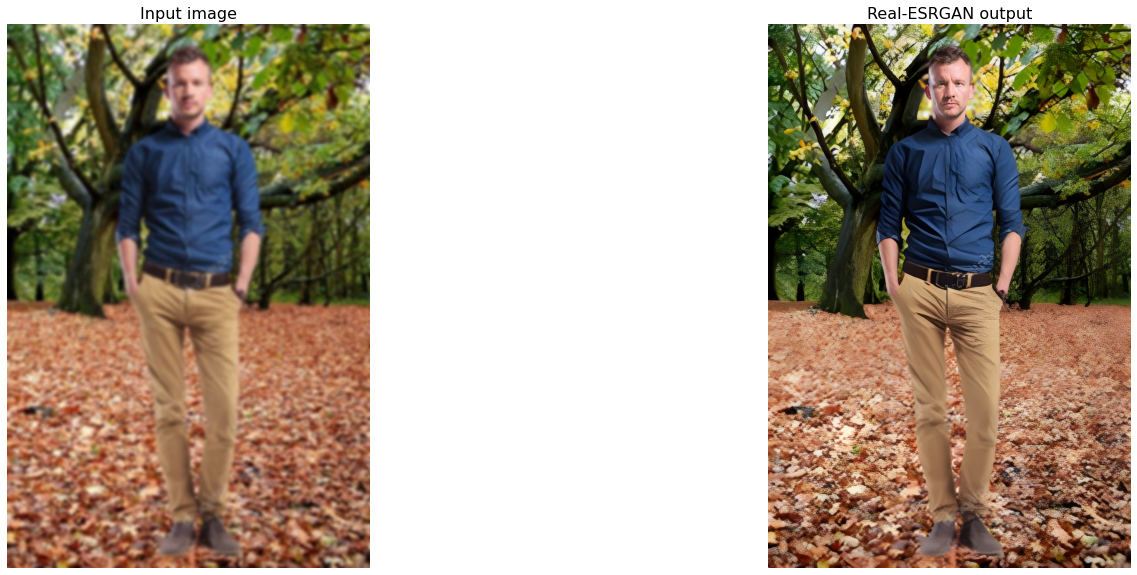

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)